**Importing Python Libraries**

In [2]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math


**BPNN Code**

In [13]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(tf.keras.Input(shape=(1,))) # Input Layer
#model.add(keras.layers.Dense(2))
model.add(keras.layers.Dense(4, activation='relu')) # Hidden Layer
model.add(keras.layers.Dense(1, activation='sigmoid')) # Output Layer

model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

**Data Importing**

In [14]:
df = pd.read_csv('NFUDS0.csv')
df.head()

,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),SOC
0,0.000000,3.471265,0.000000,0.0,1.0
1,0.999713,3.619649,0.002781,0.0,1.0
2,0.999893,3.625805,0.005563,0.0,1.0
3,0.999893,3.630341,0.008344,0.0,1.0
4,0.999713,3.633742,0.011126,0.0,1.0


In [15]:
X =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','SOC'], axis=1)
X = X.dropna()
print(X)

      Discharge_Capacity(Ah)
0                   0.000000
1                   0.000000
2                   0.000000
3                   0.000000
4                   0.000000
...                      ...
6835                1.253908
6836                1.254005
6837                1.254214
6838                1.254446
6839                1.254659

[6840 rows x 1 columns]


**Moving Average Filter for Input Quantities**

In [24]:
L=7200 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = 1  #denominator co-effs of filter transfer function
Xf = signal.lfilter(b,a,X) #filter output using lfilter function
print(Xf)

[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.0001742 ]
 [0.00017423]
 [0.00017426]]


             0
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
...        ...
6835  0.000174
6836  0.000174
6837  0.000174
6838  0.000174
6839  0.000174

[6840 rows x 1 columns]


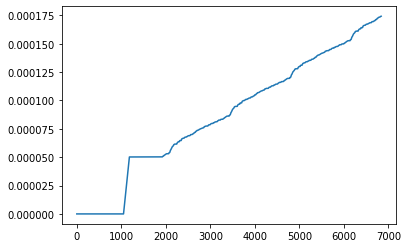

In [25]:
Xf1 = pd.DataFrame(Xf)
print(Xf1)
plt.plot(Xf1)

**Data Normalization**

             0
0    -1.000000
1    -1.000000
2    -1.000000
3    -1.000000
4    -1.000000
...        ...
6835  0.998804
6836  0.998958
6837  0.999292
6838  0.999661
6839  1.000000

[6840 rows x 1 columns]


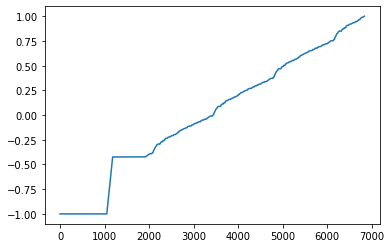

In [26]:
df_min_max_scaled = Xf1.copy()  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = -1 + 2*(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    Xn = df_min_max_scaled.copy()
# view normalized data
print(Xn)
plt.plot(Xn)

           SOC
0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
...        ...
6835  0.373046
6836  0.372997
6837  0.372893
6838  0.372777
6839  0.372671

[6840 rows x 1 columns]


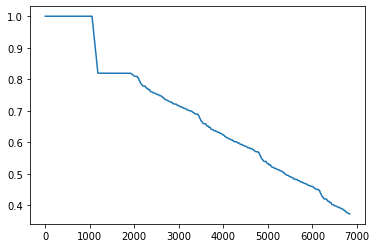

In [27]:
Y =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)'], axis=1)
Y = Y.dropna()
print(Y)
plt.plot(Y)

**Dataset Splitting into Training and Testing Data:**

Labels for training and testing data
           SOC
3182  0.703576
5456  0.494427
1456  0.819284
4124  0.611470
779   1.000000
...        ...
2738  0.733621
1497  0.819284
659   1.000000
5356  0.502740
536   1.000000

[4788 rows x 1 columns]
             0
3853  0.167431
1274 -0.423855
4409  0.295891
4621  0.338297
2123 -0.340584
...        ...
3631  0.107876
4967  0.472984
6290  0.849184
5443  0.609408
1227 -0.423855

[2052 rows x 1 columns]


(4788, 1)

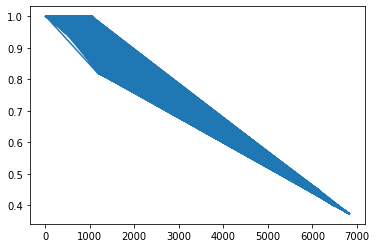

In [28]:
from sklearn.model_selection import train_test_split
train_Xn, test_Xn, train_Y, test_Y = train_test_split(Xn, Y,train_size=0.7,test_size=0.3)
print("Labels for training and testing data")
print(train_Y)
print(test_Xn)
plt.plot(train_Y)
train_Xn.shape

In [29]:
model.fit(train_Xn, train_Y, epochs=500, steps_per_epoch=1)

Epoch 1/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5276 - accuracy: 0.1564
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5276 - accuracy: 0.1564
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5276 - accuracy: 0.1564
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5276 - accuracy: 0.1564
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5275 - accuracy: 0.1564
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5275 - accuracy: 0.1564
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5275 - accuracy: 0.1564
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5275 - accuracy: 0.1564
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5275 - accuracy: 0.1564
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5275 - accuracy: 0.1564
Epoch 11/500
1/1 [=========

[[0.41313598]
 [0.41313598]
 [0.41313598]
 ...
 [0.5471787 ]
 [0.54722875]
 [0.54727477]]


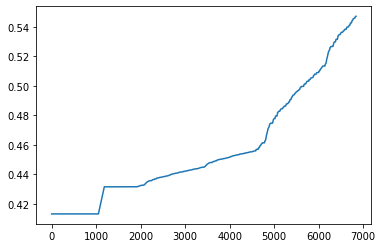

In [30]:
Yn = print(model.predict(Y))
plt.plot(model.predict(Y))